In [2]:
import sys
from pathlib import Path

# Add backend directory to sys.path for imports
# This notebook is in: backend/app/graph/health_graph.ipynb
# We need to go up 2 levels to reach backend/
backend_path = Path().resolve().parent.parent
sys.path.insert(0, str(backend_path))

print(f"✅ Backend path added: {backend_path}")

✅ Backend path added: D:\Hackathon\protothon\health-ai\health-ai\backend


# Health Graph Builder

Builds the health analysis graph with the following flow:
1. **log_context_agent** - Processes daily logs and extracts data
2. **profile_agent** - Calculates health targets (BMR, water, protein)
3. **sleep_agent** - Analyzes sleep quality and deficit
4. **hydration_agent** - Analyzes hydration (auto-suggests water based on age)
5. **analytics_agent** - Provides overall day analytics

In [3]:
from langgraph.graph import StateGraph
from app.agents.log_context_agent import log_context_agent
from app.agents.profile_agent import profile_agent
from app.agents.sleep_agent import sleep_agent
from app.agents.hydration_agent import hydration_agent
from app.agents.analytics_agent import analytics_agent

In [4]:
def build_graph():
    """
    Builds the health analysis graph with the following flow:
    1. log_context_agent - Processes daily logs and extracts data
    2. profile_agent - Calculates health targets (BMR, water, protein)
    3. sleep_agent - Analyzes sleep quality and deficit
    4. hydration_agent - Analyzes hydration (auto-suggests water based on age)
    5. analytics_agent - Provides overall day analytics
    """
    builder = StateGraph(dict)

    # Add all agents
    builder.add_node("log_context", log_context_agent)
    builder.add_node("profile", profile_agent)
    builder.add_node("sleep", sleep_agent)
    builder.add_node("hydration", hydration_agent)
    builder.add_node("analytics", analytics_agent)

    # Define the flow
    builder.set_entry_point("log_context")
    builder.add_edge("log_context", "profile")
    builder.add_edge("profile", "sleep")
    builder.add_edge("sleep", "hydration")
    builder.add_edge("hydration", "analytics")

    return builder.compile()

## Test the Graph

Build and test the health graph with sample data:

In [5]:
# Build the graph
graph = build_graph()
print("✅ Health graph built successfully!")

✅ Health graph built successfully!


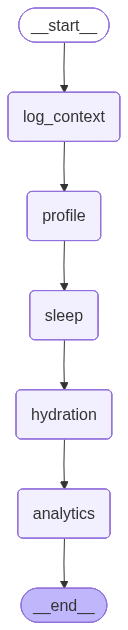

In [7]:
# Visualize the graph structure
try:
    from IPython.display import Image, display
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    # Fallback to ASCII representation
    print("\n📊 Graph Structure (ASCII):\n")
    print(graph.get_graph().draw_ascii())
    print("\n" + "="*80)

In [6]:
# Sample test data
sample_data = {
    "user_profile": {
        "age": 28,
        "weight": 72,
        "height": 175,
        "gender": "male"
    },
    "daily_logs": {
        "date": "2026-02-17",
        "sleep": {
            "hours": 7.5,
            "quality": "good"
        },
        "meals": [
            {"calories": 450, "protein_g": 25},
            {"calories": 650, "protein_g": 35},
            {"calories": 550, "protein_g": 30}
        ],
        "exercise": {
            "type": "running",
            "duration_minutes": 30,
            "intensity": "moderate",
            "calories_burned": 300
        },
        "water_intake_ml": 2200,
        "steps": 8500,
        "mood": "energetic"
    }
}

# Run the graph
result = graph.invoke(sample_data)

# Display results
print("\n" + "="*80)
print(result.get('daily_summary', ''))
print("="*80)

print("\n💡 Daily Insights:")
for insight in result.get('daily_insights', []):
    print(f"  • {insight}")


🌟 Overall Health: EXCELLENT (87/100)
Date: 2026-02-17 | Mood: energetic
Sleep: 7.5h | Hydration: 87% | Steps: 8500

💡 Daily Insights:
  • 📉 328kcal under target. Eat more to maintain energy.
  • 💪 Great protein intake! (90g / 86g)
  • 🚶 Good activity. Try to reach 10,000 steps.
  • 🏋️ Great workout! 30 minutes of running.
